In [1]:
import os
import torch
import torchvision
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader


In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'code.ipynb', 'tiny-imagenet-200']


In [3]:
train_folder = 'tiny-imagenet-200/train/'

In [4]:
print(os.listdir(train_folder))

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684'

In [5]:
def get_Files(path):
    Files=sorted(os.listdir(path))
    return Files

In [6]:
labels=get_Files(train_folder)
print(f"len(labels):{len(labels)}")

len(labels):200


In [7]:
def num_to_str(num):
    num=str(num)[::-1]
    for i in range(6-len(num)):
        num+="0"
    return num[::-1]

In [8]:
datafull_path=[]
datay=[]
for label_index in range(len(labels)):
    labelFile=train_folder+labels[label_index]+"/images/"
    imageFile=get_Files(labelFile)
    for index in range(len(imageFile)):
        datafull_path.append(labelFile+imageFile[index])
        datay.append(label_index)
    if label_index %10==0:
        print(f"label_index:{label_index}")
datafull_path=np.array(datafull_path)
datay=np.array(datay)
print(f"datafull_path.shape:{datafull_path.shape},datay.shape:{datay.shape}")

label_index:0
label_index:10
label_index:20
label_index:30
label_index:40
label_index:50
label_index:60
label_index:70
label_index:80
label_index:90
label_index:100
label_index:110
label_index:120
label_index:130
label_index:140
label_index:150
label_index:160
label_index:170
label_index:180
label_index:190
datafull_path.shape:(100000,),datay.shape:(100000,)


In [5]:
classes = sorted(os.listdir(train_folder))
print(classes)
print(len(classes))


['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684'

In [9]:
def load_dataset(data_path, batch_size=256, num_workers=0, train_test_split=0.9):
    # Définir les transoformations de la donnée
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Chargement et transformation de toutes les images
    full_dataset = torchvision.datasets.ImageFolder(root=data_path, transform=transform)

    # Division du jeu de données en jeu d'entraînement et jeu de test
    train_size = int(train_test_split * len(full_dataset))
    test_size = len(full_dataset) - train_size

    # Utiliser torch.utils.data.random_split pour la séparation entraînement/test
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

    # Créer des 'data loaders' pour le test et l'entraînement
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)

    return train_loader, test_loader


In [10]:
train_loader, _ = load_dataset(train_folder, batch_size=4)

In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

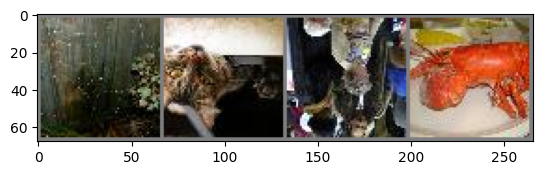

  152    30   105    18


In [12]:
def imshow(img):
    img = img / 2 + 0.5  # Dénormaliser en cas d'application de la normalisation
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Afficher images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{label.item():5d}' for label in labels))

In [13]:
train_loader, test_loader = load_dataset(train_folder)
batch_size = train_loader.batch_size
print("Data loaders ready to read", train_folder)

Data loaders ready to read tiny-imagenet-200/train/


In [14]:
def train(model, device, train_loader, optimizer, loss_criteria, epoch):
    # Mettre le modèle en mode entraînement
    model.train()
    train_loss = 0
    print(f"Epoch: {epoch}")

    # Traitement des images par lots
    for batch_idx, (data, target) in enumerate(train_loader):
        # Utiliser le CPU ou le GPU selon le cas
        data, target = data.to(device), target.to(device)

        # Réinitialiser l'optimizer
        optimizer.zero_grad()

        # Pousser les données vers l'avant à travers les couches du modèle
        output = model(data)

        # Obtenir le loss
        loss = loss_criteria(output, target)

        # Garder un total de compte en cours d'exécution
        train_loss += loss.item()

        # Obtenir la rétropropagation
        loss.backward()
        optimizer.step()

        # Indicateurs de progrès
        if (batch_idx + 1) % 100 == 0:
            print(f'Training batch {batch_idx + 1} Loss: {loss.item():.6f}')

    # Calculer la perte moyenne (Average Loss) pour chaque epoch
    avg_loss = train_loss / (batch_idx + 1)
    print(f'Training set: Average loss: {avg_loss:.6f}')
    return avg_loss


In [15]:
def test(model, device, test_loader, loss_criteria):
    # Passer le modèle en mode évaluation (pas de rétropropagation)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        # Initialiser les variables pour garder une trace du nombre de lots et des prédictions correctes
        batch_count = 0
        total_samples = len(test_loader.dataset)

        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)

            # Obtenir les classes prédites pour ce lot
            output = model(data)

            # Calculer la perte (loss) pour ce lot
            test_loss += loss_criteria(output, target).item()

            # Calculer la précision (accuracy) pour ce lot
            _, predicted = torch.max(output, 1)
            correct += predicted.eq(target).sum().item()

    # Calculer la perte moyenne (average loss) et la précision totale (total accuracy) pour cet epoch
    avg_loss = test_loss / batch_count
    accuracy = 100. * correct / total_samples

    print(f'Validation set: Average loss: {avg_loss:.6f}, Accuracy: {correct}/{total_samples} ({accuracy:.2f}%)')

    # Retourner la perte moyenne et la précision pour epoch
    return avg_loss, accuracy

Modèle CNN ResNet sans régularisation 

In [29]:
def conv3x3(in_channels, out_channels, stride=1):
    """3x3 convolution with padding."""
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks, first_block=False):
        super(ResidualBlock, self).__init__()
        self.blocks = []
        for i in range(num_blocks):
            if i == 0 and not first_block:
                # Le premier bloc de chaque lot (sauf b1) doit correspondre au nombre de canaux d'entrée.
                self.blocks.append(conv3x3(in_channels, out_channels, stride=2))
            else:
                self.blocks.append(conv3x3(out_channels, out_channels))
            self.blocks.append(nn.BatchNorm2d(out_channels))
            self.blocks.append(nn.ReLU())
        self.residual = nn.Sequential(*self.blocks)

    def forward(self, x):
        return self.residual(x)

class ResNet(nn.Module):
    def __init__(self, num_classes=200):
        super(ResNet, self).__init__()
        self.b1 = nn.Sequential(
            conv3x3(3, 64, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.b2 = ResidualBlock(64, 64, 2, first_block=True)
        self.b3 = ResidualBlock(64, 128, 2)
        self.b4 = ResidualBlock(128, 256, 2)
        self.b5 = ResidualBlock(256, 512, 2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.b4(x)
        x = self.b5(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"

# créer une instance de la classe de modèle et l'attribuer à l'appareil
model = ResNet().to(device)
print(device)
print(model)

cuda
ResNet(
  (b1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (b2): ResidualBlock(
    (residual): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (b3): ResidualBlock(
    (residual): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, 

In [30]:
# Utiliser l'optimizer Adam pour ajuster les poids du modèle
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(
    optimizer=optimizer,
    step_size=1,  # Nb des intervalles
    gamma=0.1,  # Coefficient
    last_epoch=-1
)
min_loss = float('inf')
min_epoch = 0

# Spécifier le critère de loss
loss_criteria = nn.CrossEntropyLoss()

# Suivre les mesures dans des arrays
epoch_nums = []
training_losses = []
validation_losses = []
validation_accuracy = []

# Entraîner le modèle pour un nombre spécifique des epochs
epochs = 200
print('Training on', device)
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, loss_criteria, epoch)  # loss_criteria inclus
    test_loss, test_acc = test(model, device, test_loader, loss_criteria)  # loss_criteria inclus
    epoch_nums.append(epoch)
    training_losses.append(train_loss)
    validation_losses.append(test_loss)
    validation_accuracy.append(test_acc)
    
    if test_loss < min_loss:
        min_loss = test_loss
        min_epoch = epoch
    else:
        if epoch - min_epoch >= 10:
            break
        if epoch - min_epoch >= 5 and optimizer.state_dict()['param_groups'][0]['lr'] > 1e-6:
            scheduler.step()


Training on cuda
Epoch: 1
Training batch 100 Loss: 4.537458
Training batch 200 Loss: 4.211773
Training batch 300 Loss: 3.957446
Training set: Average loss: 4.375551
Validation set: Average loss: 4.071165, Accuracy: 1188/10000 (11.88%)
Epoch: 2
Training batch 100 Loss: 3.792432
Training batch 200 Loss: 3.526240
Training batch 300 Loss: 3.323821
Training set: Average loss: 3.658783
Validation set: Average loss: 3.680488, Accuracy: 1751/10000 (17.51%)
Epoch: 3
Training batch 100 Loss: 3.605052
Training batch 200 Loss: 3.316487
Training batch 300 Loss: 3.313402
Training set: Average loss: 3.342400
Validation set: Average loss: 3.511253, Accuracy: 2057/10000 (20.57%)
Epoch: 4
Training batch 100 Loss: 3.018906
Training batch 200 Loss: 3.079707
Training batch 300 Loss: 2.942502
Training set: Average loss: 3.111785
Validation set: Average loss: 3.251019, Accuracy: 2509/10000 (25.09%)
Epoch: 5
Training batch 100 Loss: 2.926804
Training batch 200 Loss: 2.859092
Training batch 300 Loss: 2.998671


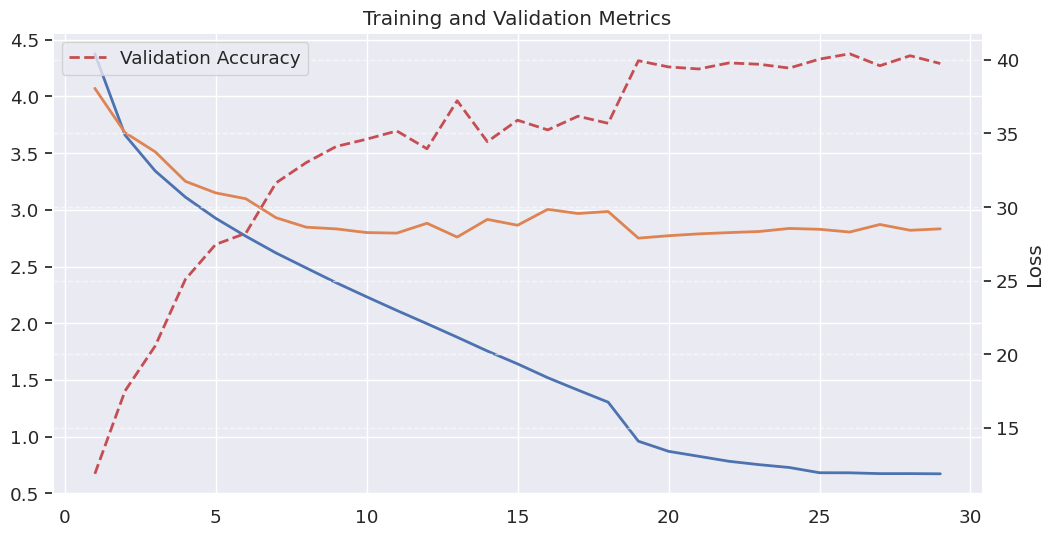

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer Entraînement et pertes de validation
plt.plot(epoch_nums, training_losses, label='Training Loss', linewidth=2)
plt.plot(epoch_nums, validation_losses, label='Validation Loss', linewidth=2)

# Tracer la précision de validation sur l'axe y
plt.twinx()
plt.plot(epoch_nums, validation_accuracy, label='Validation Accuracy', color='r', linestyle='--', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Metrics')

# Définir les étiquettes pour chaque tracé
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Modèle CNN avec régularisation : Technique du dropout

In [19]:
def conv3x3(in_channels, out_channels, stride=1):
    """3x3 convolution with padding."""
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks, first_block=False, dropout_prob=0.0):
        super(ResidualBlock, self).__init__()
        self.blocks = []
        for i in range(num_blocks):
            if i == 0 and not first_block:
                # Le premier bloc de chaque lot (sauf b1) doit correspondre au nombre de canaux d'entrée.
                self.blocks.append(conv3x3(in_channels, out_channels, stride=2))
            else:
                self.blocks.append(conv3x3(out_channels, out_channels))
            self.blocks.append(nn.BatchNorm2d(out_channels))
            self.blocks.append(nn.ReLU())
            if dropout_prob > 0:
                self.blocks.append(nn.Dropout(p=dropout_prob))
        self.residual = nn.Sequential(*self.blocks)

    def forward(self, x):
        return self.residual(x)

class ResNet(nn.Module):
    def __init__(self, num_classes=200, dropout_prob=0.0):
        super(ResNet, self).__init__()
        self.b1 = nn.Sequential(
            conv3x3(3, 64, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.b2 = ResidualBlock(64, 64, 2, first_block=True, dropout_prob=dropout_prob)
        self.b3 = ResidualBlock(64, 128, 2, dropout_prob=dropout_prob)
        self.b4 = ResidualBlock(128, 256, 2, dropout_prob=dropout_prob)
        self.b5 = ResidualBlock(256, 512, 2, dropout_prob=dropout_prob)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.b1(x)
        x = self.b2(x)
        x = self.b3(x)
        x = self.b4(x)
        x = self.b5(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"

# Créer une instance de la classe de modèle et l'attribuer à l'appareil
# Ajuster la valeur de dropout_prob (par exemple, 0,5 pour un taux d'abandon de 50 %) pour appliquer une régularisation Dropout
model = ResNet(dropout_prob=0.2).to(device)  # Appliquer dropout à une probabilité de 20%
print(device)
print(model)


cuda
ResNet(
  (b1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (b2): ResidualBlock(
    (residual): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2, inplace=False)
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.2, inplace=False)
    )
  )
  (b3): ResidualBlock(
    (residual): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, aff

In [20]:
#  Utiliser l'optimizer Adam pour ajuster les poids du modèle
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(
    optimizer=optimizer,
    step_size=1,  # Nombre d'intervalles
    gamma=0.1,  # Coefficient
    last_epoch=-1
)
min_loss = float('inf')
min_epoch = 0

# Spécifier le critère de loss
loss_criteria = nn.CrossEntropyLoss()

# Suivre les mesures dans des arrays
epoch_nums = []
training_losses = []
validation_losses = []
validation_accuracy = []

# Entraîner le modèle pour un nombre spécifique des epochs
epochs = 200
print('Training on', device)
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, loss_criteria, epoch)  # loss_criteria inclus
    test_loss, test_acc = test(model, device, test_loader, loss_criteria)  # loss_criteria inclus
    epoch_nums.append(epoch)
    training_losses.append(train_loss)
    validation_losses.append(test_loss)
    validation_accuracy.append(test_acc)
    
    if test_loss < min_loss:
        min_loss = test_loss
        min_epoch = epoch
    else:
        if epoch - min_epoch >= 10:
            break
        if epoch - min_epoch >= 5 and optimizer.state_dict()['param_groups'][0]['lr'] > 1e-6:
            scheduler.step()


Training on cuda
Epoch: 1
Training batch 100 Loss: 4.969903
Training batch 200 Loss: 4.566315
Training batch 300 Loss: 4.180871
Training set: Average loss: 4.690009
Validation set: Average loss: 4.321522, Accuracy: 888/10000 (8.88%)
Epoch: 2
Training batch 100 Loss: 4.147136
Training batch 200 Loss: 3.794760
Training batch 300 Loss: 3.846428
Training set: Average loss: 3.946934
Validation set: Average loss: 3.925209, Accuracy: 1382/10000 (13.82%)
Epoch: 3
Training batch 100 Loss: 3.758624
Training batch 200 Loss: 3.673038
Training batch 300 Loss: 3.858469
Training set: Average loss: 3.625957
Validation set: Average loss: 3.496389, Accuracy: 2036/10000 (20.36%)
Epoch: 4
Training batch 100 Loss: 3.313077
Training batch 200 Loss: 3.320115
Training batch 300 Loss: 3.412523
Training set: Average loss: 3.437192
Validation set: Average loss: 3.444434, Accuracy: 2178/10000 (21.78%)
Epoch: 5
Training batch 100 Loss: 3.329359
Training batch 200 Loss: 3.282898
Training batch 300 Loss: 3.272595
Tr

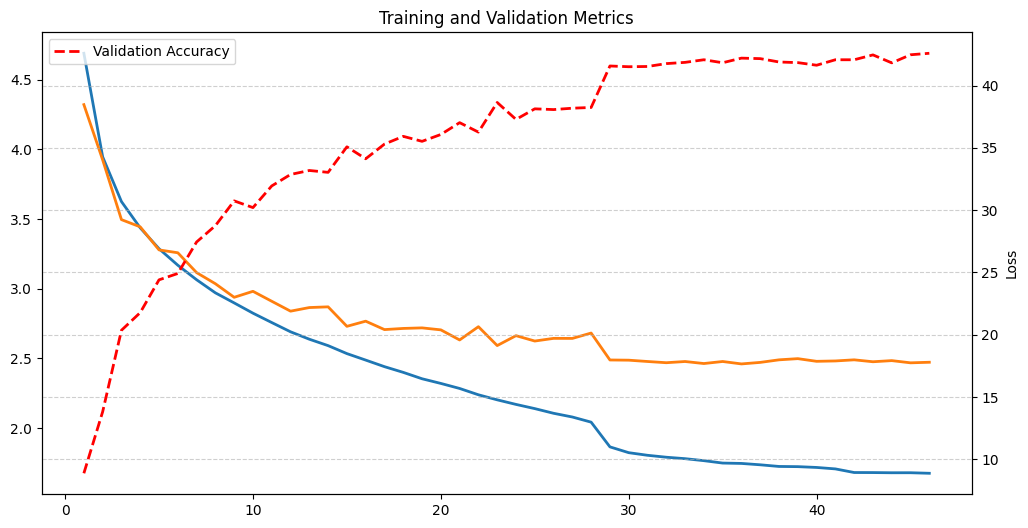

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer Entraînement et pertes de validation
plt.plot(epoch_nums, training_losses, label='Training Loss', linewidth=2)
plt.plot(epoch_nums, validation_losses, label='Validation Loss', linewidth=2)

# Tracer validation accuracy sur l'axe des y
plt.twinx()
plt.plot(epoch_nums, validation_accuracy, label='Validation Accuracy', color='r', linestyle='--', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Metrics')

# Définir les étiquettes pour chaque plot
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


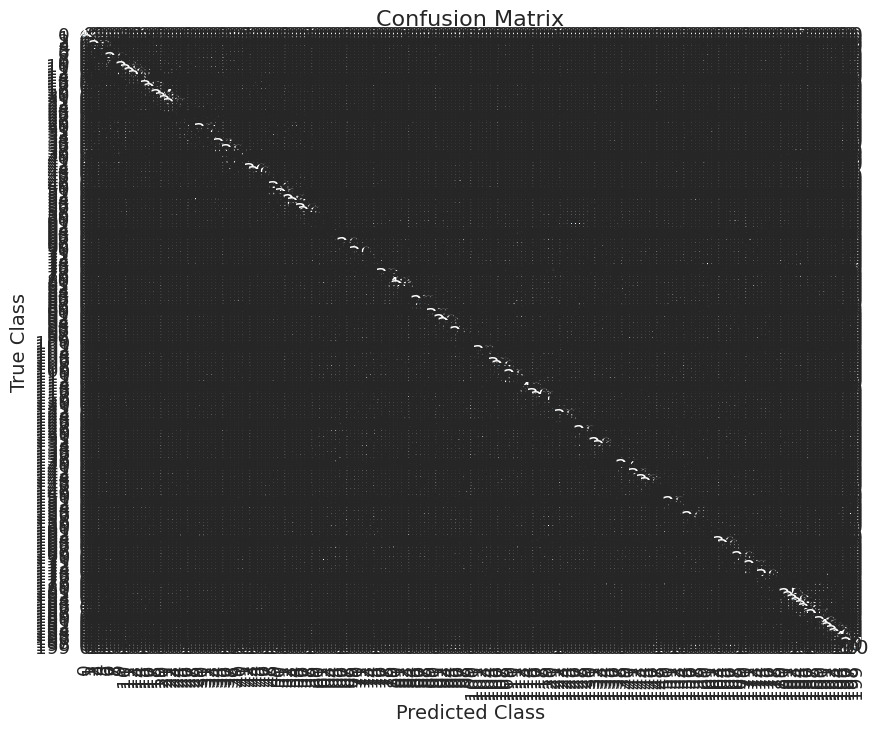

In [28]:
import seaborn as sns

# Obtenir les étiquettes des classes ( Get classes labels)
class_labels = [str(class_idx) for class_idx in range(len(classes))]

#  Tracer la matrice de confusion (Plot the confusion matrix)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=class_labels, yticklabels=class_labels
)

plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("True Class", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()